# Generating simple audio samples with music21

We'd like to synthesize simple audio samples containing a single note or a chord. The samples, however, should be parameterized by several attributes. We'd like to modify:

- pitch
- [precise frequency]
- instrument
- volume
- duration
- location in the sample

The main output should be MIDI which can be synthesized to audio. Besides that we'd like to store the parameters and metadata like the the pitch class, frequency, etc.

In this notebook we'll explore how to acomplish this with the `music21` library.

In [243]:
import music21
from music21.note import Note
from music21.stream import Stream
from music21.duration import Duration
from music21.volume import Volume
from music21.chord import Chord
from music21.tempo import MetronomeMark

In [244]:
import os
data_dir = 'data/working/example-parametric-note'
os.makedirs(data_dir, exist_ok=True)

We're about to create a Note object which represents a single note and both its pitch and duration.

In [245]:
Note('C')

<music21.note.Note C>

In [246]:
s = Stream([Note('C')])

If we have MuseScore installed, we can we the music sheet representation.

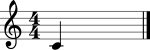

In [247]:
s.show()

In [248]:
s.show('midi')

In [249]:
s.write('midi', data_dir + '/c.midi')

'data/working/example-parametric-note/c.midi'

## Properties of the Note

In [250]:
n = Note('C')
n

<music21.note.Note C>

In [251]:
def describe_note(note):
    p = note.pitch
    print(note)
    print('pitch:', note.pitch)
    print('duration:', note.duration)
    print('name:', p.name)
    print('full name:', p.fullName)
    print('pitch class:', p.pitchClass)
    print('octave:', p.octave)
    print('frequency', p.frequency, 'Hz')
    print('midi:', p.midi)
    print('pitch space:', p.ps) # like MIDI, but floating point

In [252]:
describe_note(n)

<music21.note.Note C>
pitch: C
duration: <music21.duration.Duration 1.0>
name: C
full name: C
pitch class: 0
octave: None
frequency 261.6255653005985 Hz
midi: 60
pitch space: 60.0


## Creating Note with parameters

In [253]:
# different note in the default octave
describe_note(Note('E'))

<music21.note.Note E>
pitch: E
duration: <music21.duration.Duration 1.0>
name: E
full name: E
pitch class: 4
octave: None
frequency 329.62755691286986 Hz
midi: 64
pitch space: 64.0


In [254]:
# a note in the specific octave
describe_note(Note('G#3'))

<music21.note.Note G#>
pitch: G#3
duration: <music21.duration.Duration 1.0>
name: G#
full name: G-sharp in octave 3
pitch class: 8
octave: 3
frequency 207.65234878997245 Hz
midi: 56
pitch space: 56.0


In [255]:
# note specified by its octave and pitch class within an octave
describe_note(Note(octave=2, pitchClass=3))

<music21.note.Note E->
pitch: E-2
duration: <music21.duration.Duration 1.0>
name: E-
full name: E-flat in octave 2
pitch class: 3
octave: 2
frequency 77.78174593052012 Hz
midi: 39
pitch space: 39.0


In [256]:
# note specified by its integer MIDI number
describe_note(Note(midi=21))

<music21.note.Note A>
pitch: A0
duration: <music21.duration.Duration 1.0>
name: A
full name: A in octave 0
pitch class: 9
octave: 0
frequency 27.499999999999947 Hz
midi: 21
pitch space: 21.0


In [257]:
# microtonal pitch using the pitch space attribute (like MIDI but floating point)
describe_note(Note(ps=21.25))

<music21.note.Note A>
pitch: A0(+25c)
duration: <music21.duration.Duration 1.0>
name: A
full name: A in octave 0 (+25c)
pitch class: 9
octave: 0
frequency 27.899996710781842 Hz
midi: 21
pitch space: 21.25


## Changing duration

In [258]:
# note with duration of half of a quarter note
note = Note(midi=21, duration=Duration(0.5))
describe_note(note)

<music21.note.Note A>
pitch: A0
duration: <music21.duration.Duration 0.5>
name: A
full name: A in octave 0
pitch class: 9
octave: 0
frequency 27.499999999999947 Hz
midi: 21
pitch space: 21.0


In [259]:
# note with duration of half of a quarter note
note = Note(midi=21, duration=Duration(2.5))
describe_note(note)

<music21.note.Note A>
pitch: A0
duration: <music21.duration.Duration 2.5>
name: A
full name: A in octave 0
pitch class: 9
octave: 0
frequency 27.499999999999947 Hz
midi: 21
pitch space: 21.0


## Changing volume

Volume can be specified by parameters:

- `velocity` with range from 0 to 127 or by
- `velocityScalar` with range from 0.0 to 1.0

In [260]:
for v in [0, 32, 64, 127]:
    print(Volume(velocity=v))

<music21.volume.Volume realized=0.0>
<music21.volume.Volume realized=0.25>
<music21.volume.Volume realized=0.5>
<music21.volume.Volume realized=1.0>


In [261]:
for v in [0, 0.25, 0.5, 1.0]:
    print(Volume(velocityScalar=v))

<music21.volume.Volume realized=0.0>
<music21.volume.Volume realized=0.25>
<music21.volume.Volume realized=0.5>
<music21.volume.Volume realized=1.0>


In [262]:
Chord(['C']).volume

<music21.volume.Volume realized=0.71>

In [263]:
c = Chord([Note('C')])
c.volume = Volume(velocityScalar=0.25)
c.volume

<music21.volume.Volume realized=0.25>

## How to set tempo?

In [264]:
metronome = MetronomeMark(number=60)
metronome.durationToSeconds(Duration(1.0))

1.0

Just add a metronome mark at the beginning of the stream.

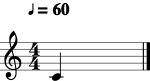

In [265]:
Stream([MetronomeMark(number=60), Note('C')]).show()